In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\harit\Desktop\Haritha Daa\Haritha HTML\Octanet\images octa\AspireNex\project2\archive (4)\WA_Fn-UseC_-Telco-Customer-Churn.csv")  # Replace with your actual file path

In [3]:
# Data preprocessing
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [4]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [5]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']


In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
    return y_pred, y_pred_proba

In [9]:
# Train and evaluate the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
y_pred, y_pred_proba = train_and_evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

AUC-ROC Score: 0.8388


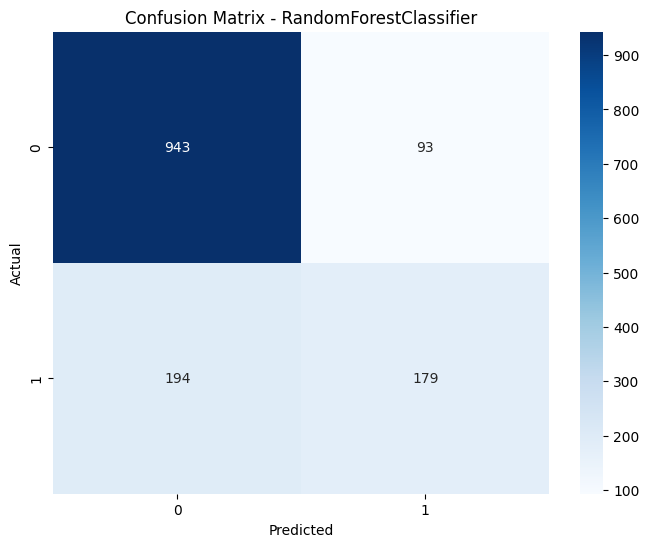

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {type(rf_model).__name__}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

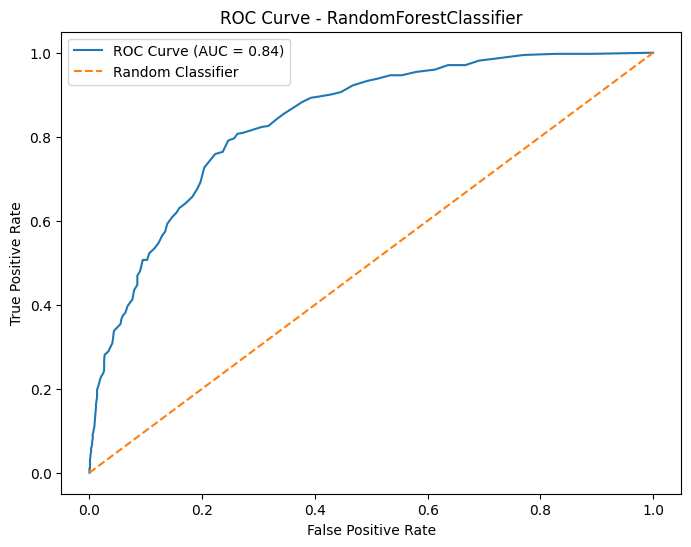

In [11]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {type(rf_model).__name__}')
plt.legend()
plt.show()

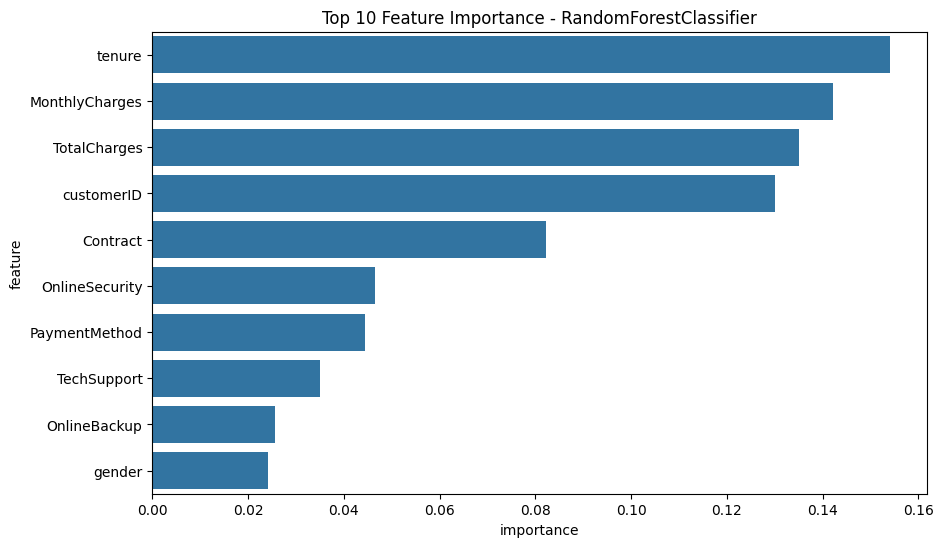

In [12]:
# Feature Importance (for tree-based models)
if hasattr(rf_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title(f'Top 10 Feature Importance - {type(rf_model).__name__}')
    plt.show()


In [13]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

AUC-ROC Score: 0.8388


(array([1, 0, 0, ..., 0, 0, 0]),
 array([0.76, 0.21, 0.04, ..., 0.  , 0.07, 0.5 ]))

In [14]:
# Train and evaluate Logistic Regression
lr_model = LogisticRegression(random_state=42)
train_and_evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

AUC-ROC Score: 0.8608


(array([1, 0, 0, ..., 0, 0, 1]),
 array([0.62077316, 0.10944574, 0.007685  , ..., 0.04450839, 0.02162414,
        0.51948057]))

In [15]:
# Train and evaluate Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(gb_model, X_train_scaled, X_test_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

AUC-ROC Score: 0.8602


(array([1, 0, 0, ..., 0, 0, 1]),
 array([0.70057799, 0.09504678, 0.0232284 , ..., 0.03460408, 0.03618385,
        0.61512765]))